#the 1st question. I did a demo so completely ignore that. go to the 2nd cell direct.

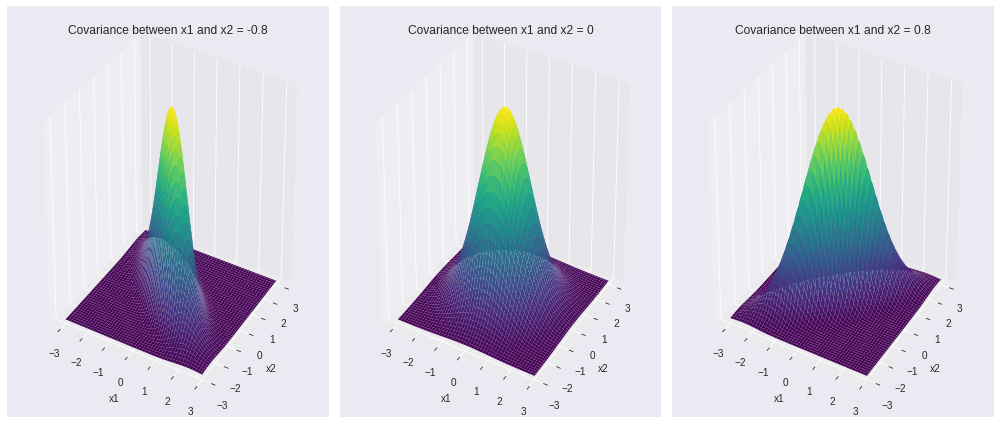

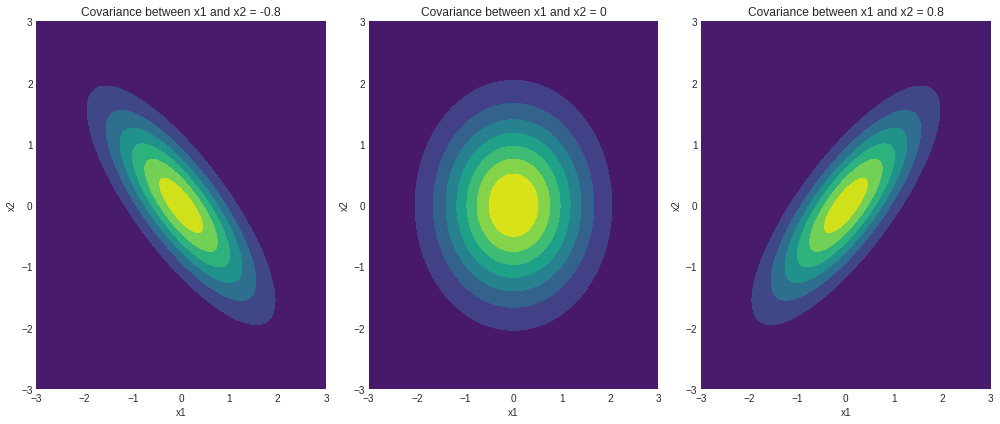

In [1]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
#from jax import jax.random.multivariate_normal
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = jnp.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
	
	# Initializing the covariance matrix
	cov = jnp.array([[1, val], [val, 1]])
	
	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)
	
	# Generating a meshgrid complacent with
	# the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	
	x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)
	
	# Generating the density function
	# for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	
	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()


task one still to do 3d plot

In [11]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import random
import matplotlib.pyplot as plt
import ipywidgets as widgets




def fig1(covr, mean_1,mean_2):
    key = random.PRNGKey(0)
    #covr = 0.4
    cov = np.array([[1, covr], [covr, 1.0]])
    #mean_1=0
    #mean_2 = 0
    mean = np.array([mean_1,mean_2])
    x1,x2 = jax.random.multivariate_normal(key, mean, cov, (5000,)).T
    print(x1,x2)
    '''pdf = np.zeros(x1.shape)
    for i in range(x1.shape[0]):
        for j in range(x1.shape[1]):
            pdf[i,j] = distr.pdf([x1[i,j], x2[i,j]])
    '''
    a1 = jax.scipy.stats.multivariate_normal.pdf(x1, mean_1, covr)
    a2 = jax.scipy.stats.multivariate_normal.pdf(x2, mean_2, covr)
    plt.plot(x1,x2,'o')
    plt.plot(x1,-a1)
    plt.plot(-a2,x2)
    plt.scatter(x1,x2)
    #ax.axes.zaxis.set_ticks([])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.ylim(-10,10)
    plt.plot
    plt.show()
#fig1(0.4,1,2)
iplot = widgets.interact(fig1,
                            covr=(0,1,0.01),
                            mean_1=(0,10,0.1),
                            mean_2= (0,10,0.1))
iplot



interactive(children=(FloatSlider(value=0.0, description='covr', max=1.0, step=0.01), FloatSlider(value=5.0, d…

<function __main__.fig1>

This is not actually a 3d plut but it kind of behaves like one , we did trickery to do this it can be considered as projection kind showing the marginal pdf.